<a href="https://colab.research.google.com/github/RyanXJu/web-Scraper/blob/master/scrape_Realtor_ca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### check if the website allows scraping
#### adding /robots.txt to the original domain

### if the site doesn't allow scraping, we can  define a header to pass along the ***get*** command, which will basically make our queries to the website look like they are coming from an actual browser

## Scrape web

In [2]:
headers = {
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
        'referrer': 'https://google.com',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
        'Pragma': 'no-cache',
    }

'\r\n<!DOCTYPE html>\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n<head><script src="/e8469ba99880590089b6cb783b503a90" async></script><meta charset="utf-8" /><meta name="theme-color" content="#D0191D" /><meta name="viewport" content="width=device-width" /><meta name="google" content="notranslate" /><meta http-equiv="CACHE-CONTROL" content="NO-CACHE" /><meta http-equiv="PRAGMA" content="NO-CACHE" /><meta name="GOOGLEBOT" content="NOARCHIVE" /><meta name="format-detection" content="telephone=no" /><meta name="shareaholic:site_id" content="a2430a87e639e6cf0f00273171d97103" />\r\n    <link rel="alternate" hreflang="en" href="https://www.realtor.ca/qc/montreal/real-estate" />\r\n    \r\n    <link rel="alternate" hreflang="fr" href="https://www.realtor.ca/qc/montréal/immobilier" />\r\n    \r\n    <link rel="canonical" href="https://www.realtor.ca/qc/montreal/real-estate" />\r\n    <title>\r\n\tReal Estate in Montréal | REALTOR.ca\r\n</title>\r\n\r\n    <!-- FavIcon and browse
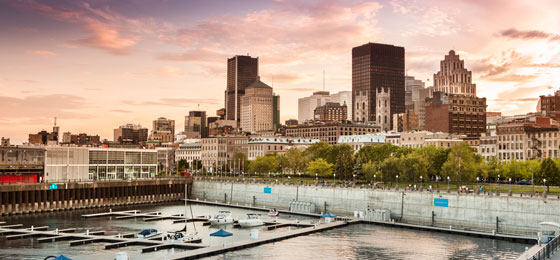

In [3]:
# define the url to use

realtor = "https://www.realtor.ca/qc/montreal/real-estate"

response = get(realtor, headers=headers)

response.text

In [4]:
print(response)
# list of HTTP status codes : https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

<Response [200]>


In [5]:
print(response.text[:1000])


<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
<head><script src="/e8469ba99880590089b6cb783b503a90" async></script><meta charset="utf-8" /><meta name="theme-color" content="#D0191D" /><meta name="viewport" content="width=device-width" /><meta name="google" content="notranslate" /><meta http-equiv="CACHE-CONTROL" content="NO-CACHE" /><meta http-equiv="PRAGMA" content="NO-CACHE" /><meta name="GOOGLEBOT" content="NOARCHIVE" /><meta name="format-detection" content="telephone=no" /><meta name="shareaholic:site_id" content="a2430a87e639e6cf0f00273171d97103" />
    <link rel="alternate" hreflang="en" href="https://www.realtor.ca/qc/montreal/real-estate" />
    
    <link rel="alternate" hreflang="fr" href="https://www.realtor.ca/qc/montréal/immobilier" />
    
    <link rel="canonical" href="https://www.realtor.ca/qc/montreal/real-estate" />
    <title>
	Real Estate in Montréal | REALTOR.ca
</title>

    <!-- FavIcon and browser tile defaults (begin)-->



## make the Soup!

In [6]:
html_soup = BeautifulSoup(response.text, 'html.parser')

an object that can be iterated while we scrape the results in each search page






In [7]:
house_containers = html_soup.find_all('div', class_="listingCard card")

In [8]:
first = house_containers[0]
first.find_all('div')

[<div class="listingCardHeader">
 <div class="listingCardHeaderLeft">
 </div>
 <div class="listingCardHeaderRight" data-binding="visible=ShowHeaderIcons">
 <a aria-label="Add Notes" class="propertyCardDetailsNoteIcon noteIcon listingCardActionIcon" data-binding="data-value={Id}_{AddressForNotes}_{Latitude}_{Longitude}" data-value="21829718_1155 Rue de la Montagne, #A, Montréal (Ville-Marie), Quebec _45.496628_-73.572402" href="#" style="text-decoration: none; display: none;">
 <span class="listingCardNoteIcon m_al fa fa-sticky-note" style="font-size: 31px; color: #F3E500;"></span></a>
 <a aria-label="Add to My Favourites" class="propertyCardDetailsFavouriteIcon favouriteIcon listingCardActionIcon" data-binding="data-value={Id}_{Latitude}_{Longitude}_{AppMode}" data-value="21829718_45.496628_-73.572402_1" href="#" onclick="" style="text-decoration: none;">
 <img alt="" src="/images/common/icons/svg/heart-empty.svg" style="height: 27px; width: 31px;"/>
 </a>
 </div>
 </div>, <div class="

In [9]:
first.find_all("img")

[<img alt="" src="/images/common/icons/svg/heart-empty.svg" style="height: 27px; width: 31px;"/>,
 <img alt="1155 Rue de la Montagne, #A, Montréal (Ville-Marie), Quebec " class="listingCardImage" data-binding="src=ImageURL,alt=Address" src="https://cdn.realtor.ca/listings/TS637244545450230000/reb5/medres/4/20728434_1.jpg">
 </img>,
 <img alt="" src="/images/common/icons/svg/bath-gray.svg"/>,
 <img alt="" src="/images/common/icons/svg/house-gray2.svg"/>,
 <img alt="Guoqing Feng photo" class="listingCardRealtorImg" data-binding="src=RealtorImageURL,alt=RealtorImageAltText" src="https://cdn.realtor.ca/individual/TS637145428800000000/lowres/1224752.jpg"/>,
 <img alt="IMMEUBLE HOMEMAX INC./HOMEMAX REALTY INC. logo" class="listingCardOfficeImg" data-binding="visible=HasOfficeLogo,src=OfficeLogo,alt=OfficeAltText" src="https://cdn.realtor.ca/organization/en-CA/TS637244542470000000/lowres/1193181.jpg"/>]

In [12]:
# price
price = first.find_all("div", class_="listingCardPrice")[0].text

import re
price = re.sub("[^\d\.]", "", price)
print(price)

# address
address = first.find_all("div", class_="listingCardAddress")[0].text.lstrip().rstrip()
print(address)

# thumbnail img url
img = str(first.find_all("img")[1])
img
imgurl = img[img.find("src=", img.find("src")+1)+4 : len(img)-8] # find the second occurance of "src="
print(imgurl)

# Realtor name (extract from listingCardRealtorImg)
img_realtor = str(first.find_all("img")[4])
realtor = img_realtor[img_realtor.find("alt=")+5 : img_realtor.find("photo")] # find the second occurance of "src="
print(realtor)

# Realtor office (extract from listingCardOfficeImg)
img_logo = str(first.find_all("img")[5])
office = img_logo[img_logo.find("alt=")+5 : img_logo.find("logo")] # find the second occurance of "src="
print(office)

75000
1155 Rue de la Montagne, #A, Montréal (Ville-Marie), Quebec
"https://cdn.realtor.ca/listings/TS637244545450230000/reb5/medres/4/20728434_1.jpg"
Guoqing Feng 
IMMEUBLE HOMEMAX INC./HOMEMAX REALTY INC. 


In [11]:
# get all the links
for url in first.find_all('a', class_="blockLink listingDetailsLink" ):
    print(url.get('href'))
    # adding the domain part to the url
    url_complet = "https://www.realtor.ca"+ url.get("href")
    print(url_complet)


/real-estate/21829718/1155-rue-de-la-montagne-a-montréal-ville-marie-golden-square-mile
https://www.realtor.ca/real-estate/21829718/1155-rue-de-la-montagne-a-montréal-ville-marie-golden-square-mile


## scraper

In [ ]:
# setting up the lists that will form our dataframe with all the results

prices = []
address = []
thumbnails = []
realtors = []
agencies = []



In [ ]:
%%time

n_pages = 0

for page in range(1,700):

    # add delays
    delays = [7, 4, 6, 2, 10, 19]
    delay = np.random.choice(delays)
    time.sleep(delay)

    n_pages += 1

# https://www.realtor.ca/map#view=list&Sort=1-A&GeoIds=g30_f25dfkk6&GeoName=Montr%26%23233%3Bal%2C%20QC&PropertyTypeGroupID=1&PropertySearchTypeId=1&TransactionTypeId=2&Currency=CAD
# https://www.realtor.ca/map#view=list&CurrentPage=1&Sort=1-A&GeoIds=g30_f25dfkk6&GeoName=Montr%26%23233%3Bal%2C%20QC&PropertyTypeGroupID=1&PropertySearchTypeId=1&TransactionTypeId=2&Currency=CAD
# https://www.realtor.ca/map#view=list&CurrentPage=3&Sort=1-A&GeoIds=g30_f25dfkk6&GeoName=Montr%26%23233%3Bal%2C%20QC&PropertyTypeGroupID=1&PropertySearchTypeId=1&TransactionTypeId=2&Currency=CAD    
    
    Realtor_url = 'https://www.realtor.ca/map#view=list&CurrentPage='+str(page)+"&Sort=1-A&GeoIds=g30_f25dfkk6&GeoName=Montr%26%23233%3Bal%2C%20QC&PropertyTypeGroupID=1&PropertySearchTypeId=1&TransactionTypeId=2&Currency=CAD"
    r = get(Realtor_url, headers=headers)
    page_html = BeautifulSoup(r.text, 'html.parser')
    house_containers = page_html.find_all('div', class_="listingCard card")
    if house_containers != []:
        for container in house_containers:
            
            # Price 
            price = first.find_all("div", class_="listingCardPrice")[0].text
            price = re.sub("[^\d\.]", "", price)
            print(price)
            prices.append(int(price))

            # # address
            # address = first.find_all("div", class_="listingCardAddress")[0].text.lstrip().rstrip()
            # print(address)
            # address.append(address)

            # # thumbnail img url
            # img = str(first.find_all("img")[1])
            # imgurl = img[img.find("src=", img.find("src")+1)+4 : len(img)-8] # find the second occurance of "src="
            # print(imgurl)
            # thumbnails.append(imgurl)

            # # Realtor name (extract from listingCardRealtorImg)
            # img_realtor = str(first.find_all("img")[5])
            # realtor = img_realtor[img_realtor.find("alt=")+5 : img_realtor.find("photo")] # find the second occurance of "src="
            # print(realtor)
            # realtors.append(realtor)

            # # Realtor office (extract from listingCardOfficeImg)
            # img_logo = str(first.find_all("img")[6])
            # agency = img_logo[img_logo.find("alt=")+5 : img_logo.find("logo")] # find the second occurance of "src="
            # print(agency)
            # agencies.append(agency)
    else:
        break
    
    sleep(randint(1,2))
    
print('You scraped {} pages containing {} properties.'.format(n_pages, len(address)))

You scraped 1 pages containing 0 properties.
CPU times: user 15.1 ms, sys: 875 µs, total: 15.9 ms
Wall time: 4.14 s
